In [1]:
import cptac
import pandas as pd
import cnvutils
import matplotlib.pyplot as plt
import seaborn as sns

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (C:\Users\chels\anaconda3\envs\notebooks\lib\site-packages\ipykernel_launcher.py, line 1)


In [2]:
luad = cptac.Luad()

In [6]:
driver_genes = cnvutils.get_driver_genes()
driver_genes = driver_genes.set_index('Gene')
driver_genes.index.rename('Name', inplace=True)
locations = cnvutils.get_gene_locations()
driver_with_loc = driver_genes.reset_index().merge(locations.reset_index())
genes = driver_with_loc[(driver_with_loc.chromosome == '13')].Name.unique()

In [9]:
luad_prot = luad.get_proteomics(tissue_type='tumor')
genes = [gene for gene in genes if gene in luad_prot.columns]
luad_prot[genes]

Name,BRCA2,DACH1,FLT3,KLF5,LATS2,PDS5B,RB1,ZMYM2
Database_ID,NP_000050.2,NP_542937.3|NP_542938.3|NP_004383.4|NP_444511.1|NP_001132986.1,NP_004110.2,NP_001721.2|NP_001273747.1|NP_006554.1|NP_057354.1,NP_055387.2,NP_055847.1,NP_000312.2,NP_001340090.1|NP_001340092.1|NP_001177893.1|NP_001340094.1
Patient_ID,,,,,,,,
C3L-00001,0.5801,-3.4373,-1.6763,-1.2250,NaN,-0.4298,-1.3513,0.2204
C3L-00009,0.1892,-3.5743,-0.8763,-2.1913,-0.3776,0.2384,1.2472,0.5936
C3L-00080,-1.2162,-3.0791,0.3234,NaN,-0.6571,-0.0396,-0.8490,1.2413
C3L-00083,2.3207,0.4149,0.7456,NaN,NaN,0.3322,0.7374,-0.6103
C3L-00093,-2.8482,NaN,0.8474,-1.5939,NaN,-0.4069,0.5391,-0.1341
...,...,...,...,...,...,...,...,...
C3N-02729,-2.4255,NaN,1.0152,1.1347,0.1894,0.4486,-0.3519,1.0330
X11LU013,-0.5205,NaN,-1.2417,-1.7596,-1.4180,-0.3524,-0.7835,-0.0242


In [10]:
luad_trans = luad.get_transcriptomics(tissue_type='tumor')
genes = [gene for gene in genes if gene in luad_trans.columns]
luad_trans[genes]

Name,BRCA2,DACH1,FLT3,KLF5,LATS2,PDS5B,RB1,ZMYM2
Patient_ID,,,,,,,,
C3L-00001,1.9277,-2.0955,0.2329,4.8827,2.8369,3.4144,3.6676,4.3156
C3L-00009,1.8259,-0.2438,-0.5418,3.4430,2.6684,3.5184,4.3868,4.7317
C3L-00080,1.9974,-0.3617,-1.2546,3.7382,1.8099,3.3812,3.5747,4.5110
C3L-00083,-0.1094,0.4267,0.4743,2.5745,3.2846,2.6798,2.9209,3.2883
C3L-00093,2.3880,-1.4842,-0.0710,4.2234,2.7072,3.2455,4.2577,4.3935
...,...,...,...,...,...,...,...,...
C3N-02729,1.5855,-3.2815,-1.3702,5.1980,2.4935,3.6442,3.7743,4.8021
X11LU013,1.5308,-0.7675,-1.5381,3.3947,2.4470,2.9129,3.3814,3.7359
X11LU016,1.5196,-1.1420,-1.4724,4.7384,1.8460,2.9797,4.0904,3.8541


In [11]:
luad_cnv = luad.get_CNV()
genes = [gene for gene in genes if gene in luad_cnv.columns]
luad_cnv[genes]

Name,BRCA2,DACH1,FLT3,KLF5,LATS2,PDS5B,RB1,ZMYM2
Patient_ID,,,,,,,,
C3L-00001,-0.0600,-0.0600,-0.0600,-0.0600,-0.0600,-0.0600,-0.0600,-0.0600
C3L-00009,-0.0354,-0.2542,-0.0354,-0.2542,-0.0354,-0.0354,-0.0354,-0.0354
C3L-00080,-0.3374,-0.3392,-0.3374,-0.3392,-0.3374,-0.3374,-0.3374,-0.3374
C3L-00083,-0.0075,-0.0168,-0.0075,-0.0168,-0.0075,-0.0075,-0.0075,-0.0075
C3L-00093,-0.0205,-0.0205,-0.0205,-0.0205,-0.0205,-0.0205,-0.0205,-0.0205
...,...,...,...,...,...,...,...,...
C3N-02729,0.2705,0.2705,0.2705,0.2705,0.2705,0.2705,0.2705,0.2705
X11LU013,-0.4184,-0.4184,-0.4184,-0.4184,-0.4184,-0.4184,-0.4184,-0.4184
X11LU016,-0.3071,0.0152,-0.3071,0.0152,-0.3071,-0.3071,-0.3071,-0.3071


In [ ]:
luad_has_event = pd.read_csv("luad_has_event.tsv", sep='\t', index_col=0)

In [53]:
luad = cptac.Luad()
luad_cnv = luad.get_CNV()
luad_cnv = luad_cnv.join(luad_has_event)
luad_cnv = luad_cnv[luad_cnv.loss_event]
luad_cnv = luad_cnv.drop("loss_event", axis=1)

In [54]:
luad_cnv.index.rename("Name", inplace=True)

In [55]:
locations = cnvutils.get_gene_locations()

In [56]:
locations = locations.reset_index().set_index('Name')

In [59]:
luad_cnv_loc = luad_cnv.transpose().join(locations)
cnv_long = luad_cnv_loc.melt(id_vars=['chromosome', 'start_bp', 'end_bp', 'arm', 'Database_ID'], var_name='patient', value_name='cnv')

In [60]:
cnv_long

,chromosome,start_bp,end_bp,arm,Database_ID,patient,cnv
0,19,58345178.0,58353492.0,q,NaN,C3L-00080,0.5650
1,19,58345178.0,58353492.0,q,ENSG00000121410.7,C3L-00080,0.5650
2,19,58345178.0,58353492.0,q,ENSG00000121410.11,C3L-00080,0.5650
3,10,50799409.0,50885675.0,q,ENSG00000148584.14,C3L-00080,-0.2897
4,10,50799409.0,50885675.0,q,NaN,C3L-00080,-0.2897
...,...,...,...,...,...,...,...
1989004,17,4004445.0,4143030.0,p,NaN,X11LU035,-0.2549
1989005,17,4004445.0,4143030.0,p,ENSG00000074755.14,X11LU035,-0.2549
1989006,NaN,NaN,NaN,NaN,NaN,X11LU035,0.0160
1989007,NaN,NaN,NaN,NaN,ENSG00000036549.8,X11LU035,0.0160


In [27]:
luad_has_event = pd.read_csv("luad_has_event.tsv", sep='\t', index_col=0)

In [28]:
luad_has_event

,loss_event
C3L-00001,False
C3L-00009,False
C3L-00080,True
C3L-00083,False
C3L-00093,False
...,...
C3N-02729,False
X11LU013,True
X11LU016,True
X11LU022,True


In [61]:
cnv_long_13 = cnv_long[cnv_long.chromosome == '13']

In [62]:
cnv_long_13

,chromosome,start_bp,end_bp,arm,Database_ID,patient,cnv
172,13,95019835.0,95301475.0,q,ENSG00000125257.13,C3L-00080,-0.3367
173,13,95019835.0,95301475.0,q,ENSG00000125257.9,C3L-00080,-0.3367
174,13,95019835.0,95301475.0,q,NaN,C3L-00080,-0.3367
238,13,108218392.0,108234243.0,q,ENSG00000139826.5,C3L-00080,-0.3367
239,13,108218392.0,108234243.0,q,NaN,C3L-00080,-0.3367
...,...,...,...,...,...,...,...
1987323,13,19958670.0,20091829.0,q,ENSG00000121741.11,X11LU035,-0.2382
1987324,13,19958670.0,20091829.0,q,NaN,X11LU035,-0.2382
1987330,13,19823482.0,19863649.0,q,ENSG00000132950.14,X11LU035,-0.2382
1987331,13,19823482.0,19863649.0,q,ENSG00000132950.18,X11LU035,-0.2382


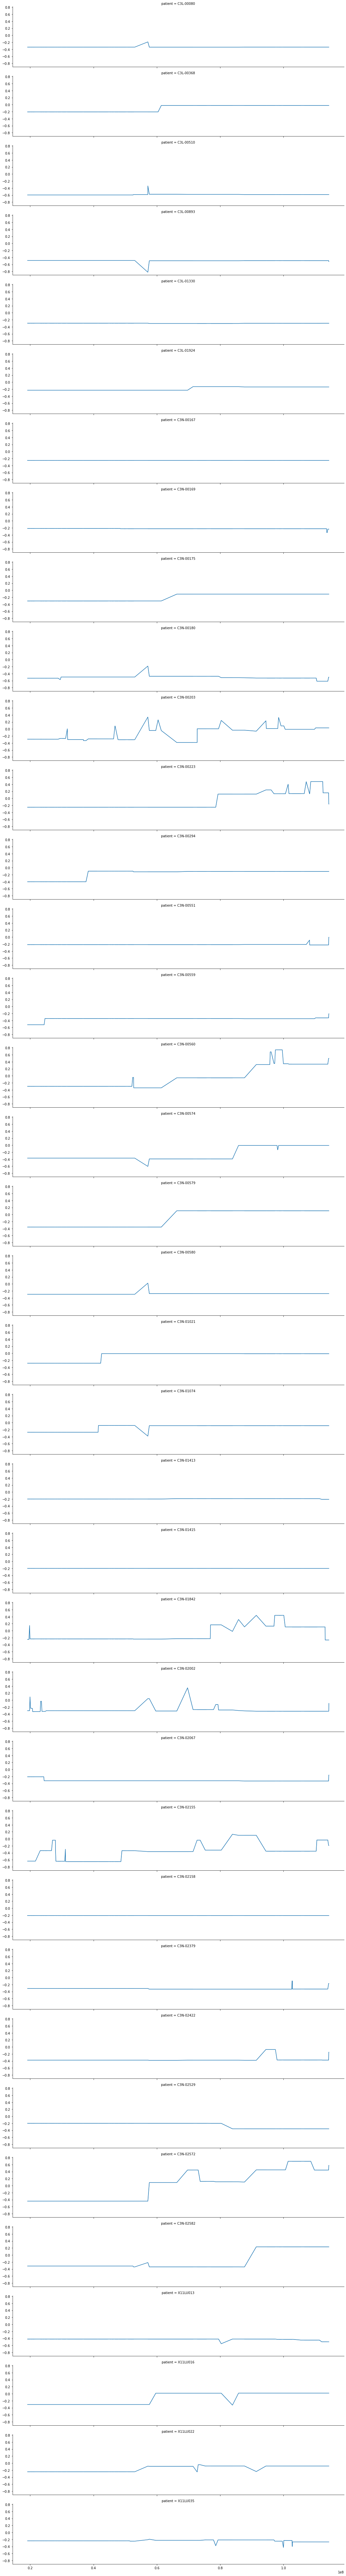

In [63]:
g = sns.FacetGrid(data=cnv_long_13, row='patient', aspect=5)
g.map_dataframe(sns.lineplot, x='start_bp', y='cnv')

cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-64-d7326f873047>, line 2)


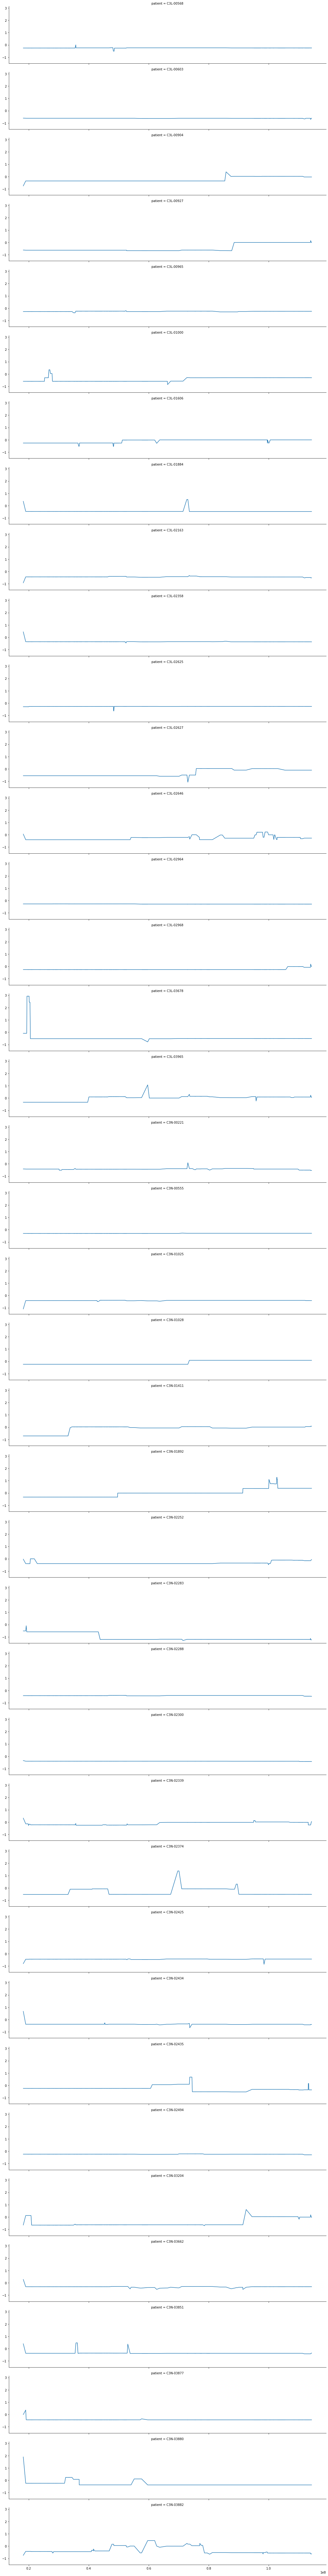

In [64]:
lscc_has_event = pd.read_csv("lscc_has_event.tsv", sep='\t', index_col=0)
lscc = cptac.Lscc()
lscc_cnv = lscc.get_CNV()
lscc_cnv = lscc_cnv.join(lscc_has_event)
lscc_cnv = lscc_cnv[lscc_cnv.loss_event]
lscc_cnv = lscc_cnv.drop("loss_event", axis=1)
lscc_cnv.index.rename("Name", inplace=True)
locations = cnvutils.get_gene_locations()
locations = locations.reset_index().set_index('Name')
lscc_cnv_loc = lscc_cnv.transpose().join(locations)
cnv_long = lscc_cnv_loc.melt(id_vars=['chromosome', 'start_bp', 'end_bp', 'arm', 'Database_ID'], var_name='patient', value_name='cnv')
cnv_long_13 = cnv_long[cnv_long.chromosome == '13']
g = sns.FacetGrid(data=cnv_long_13, row='patient', aspect=5)
g.map_dataframe(sns.lineplot, x='start_bp', y='cnv')

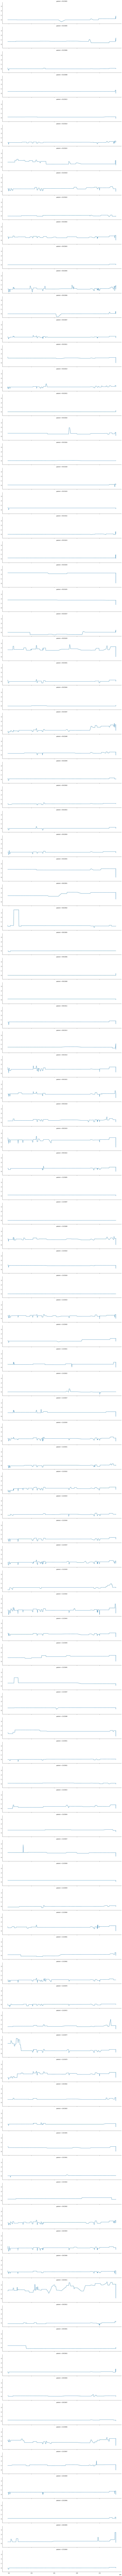

In [65]:
# colon_has_event = pd.read_csv("lscc_has_event.tsv", sep='\t', index_col=0)
colon = cptac.Colon()
colon_cnv = colon.get_CNV()
# colon_cnv = colon_cnv.join(lscc_has_event)
# lscc_cnv = lscc_cnv[lscc_cnv.loss_event]
# lscc_cnv = lscc_cnv.drop("loss_event", axis=1)
colon_cnv.index.rename("Name", inplace=True)
locations = cnvutils.get_gene_locations()
locations = locations.reset_index().set_index('Name')
colon_cnv_loc = colon_cnv.transpose().join(locations)
cnv_long = colon_cnv_loc.melt(id_vars=['chromosome', 'start_bp', 'end_bp', 'arm', 'Database_ID'], var_name='patient', value_name='cnv')
cnv_long_13 = cnv_long[cnv_long.chromosome == '13']
g = sns.FacetGrid(data=cnv_long_13, row='patient', aspect=5)
g.map_dataframe(sns.lineplot, x='start_bp', y='cnv')